<a href="https://colab.research.google.com/github/srisound2k04/Code-Casa-/blob/main/Another_copy_of_Copy_of_Copy_of_finalmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


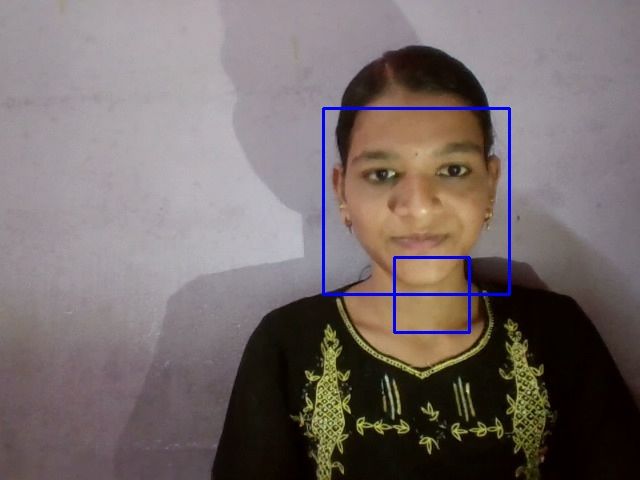

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

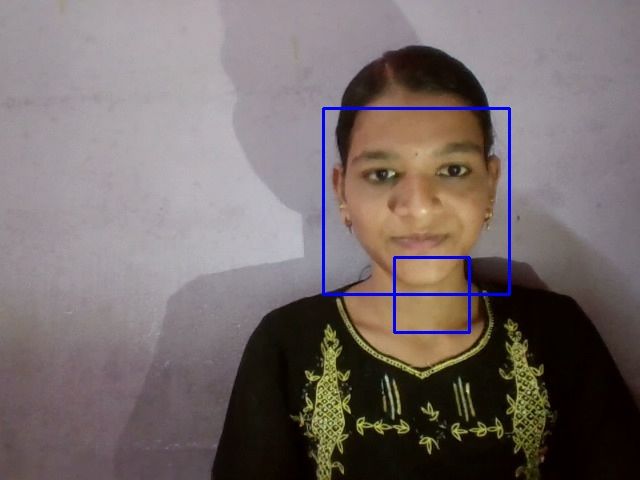

In [ ]:
from PIL import Image
im = Image.open('photo.jpg')
im

In [ ]:
!pip install deepface

In [ ]:
from deepface import DeepFace

In [ ]:
face_analysis = DeepFace.analyze(img_path ="photo.jpg")

In [ ]:
face_analysis


In [ ]:
emotion=(face_analysis[0]["dominant_emotion"])
ethnicity=(face_analysis[0]["dominant_race"])
age=(face_analysis[0]["age"])
print(emotion)



In [ ]:
import IPython

In [ ]:
import random

In [ ]:
S1="/content/drive/MyDrive/Songs/happy_song/Ranjithame-MassTamilan.dev.mp3"
S2="/content/drive/MyDrive/Songs/happy_song/happy Indian song/Mallipoo-MassTamilan.dev.mp3"
S3="/content/drive/MyDrive/Songs/sad_song/sad Indian song /Ennadi kollathee.mp3"
S4="/content/drive/MyDrive/Songs/happy_song/_Idhazhin Oram The Innocence Of Love-SenSongsMp3.Co.mp3"
S5="/content/drive/MyDrive/Songs/happy_song/Kaathalenum.mp3"
S6="/content/drive/MyDrive/Songs/sad_song/sad Indian song /Ava enna enna thedi.mp3"
S7="/content/drive/MyDrive/Songs/sad_song/Ennodu ni irunthal.mp3"
S8="/content/drive/MyDrive/Songs/sad_song/Then mozhi.mp3"
S9="/content/drive/MyDrive/Songs/sad_song/Venmegam pennaga.mp3"
S10="/content/drive/MyDrive/Songs/sad_song/Kannoram kannoram.mp3"
S11="/content/drive/MyDrive/Songs/netural_song/netural Indian song/Kodi Aruvii.mp3"
S12="/content/drive/MyDrive/Songs/netural_song/netural Indian song/Yarumillaaa.mp3"
S13="/content/drive/MyDrive/Songs/netural_song/Megham-Karukatha-MassTamilan.dev.mp3"
S14="/content/drive/MyDrive/Songs/netural_song/sara sara.mp3"
S15="/content/drive/MyDrive/Songs/netural_song/Poongkaatrilae (1).mp3"
S16="/content/drive/MyDrive/Songs/netural_song/Kadhal-Rojave.mp3"
S17="/content/drive/MyDrive/Songs/netural_song/netural Indian song/munbey vaa.mp3"
S18="/content/drive/MyDrive/Songs/sad_song/Kannoram kannoram.mp3"
S19="/content/drive/MyDrive/Songs/sad_song/Ennodu ni irunthal.mp3"
S20="/content/drive/MyDrive/song/neutral indian song/Thalli-Pogathey.mp3"
s21="/content/drive/MyDrive/Songs/sad_song/sad Indian song /Yamma yamma.mp3"
s22="/content/drive/MyDrive/Songs/Aval.mp3"
s23="/content/drive/MyDrive/Songs/Vel - Kovakkara Kiliye Video _ Yuvanshankar Raja_ Suriya(M4A_128K).m4a"
s24="/content/drive/MyDrive/Songs/Oxygen - Video Song _ Kavan _ Hiphop Tamizha _ K V Anand _ Vijay Sethupathi_ Madonna Sebastian(M4A_128K).m4a"
s25="/content/drive/MyDrive/Songs/Poraney Poraney Official Video Song _ Vaagai Sooda Vaa _ Vimal _ Iniya _ Ghibran(M4A_128K).m4a"
s26="/content/drive/MyDrive/Songs/Snehithane Snehithane Video Song _ Alaipayuthey Tamil Movie _ Madhavan _ Shalini _ A.R. Rahman(M4A_128K).m4a"
s27="/content/drive/MyDrive/Songs/Soorarai Pottru - Kaattu Payale Video _ Suriya_ Aparna _ G.V. Prakash Kumar _ Sudha Kongara(M4A_128K).m4a"
s35="https://drive.google.com/file/d/1YXUBMAaP5O6eSrr41Ka2ho_faME6H_cZ/view?usp=sharing"
h=[S17,S20,S1,S2,S4,S5,]
s=[S6,S7,S8,S9,S10,S18,S3,s21]
n=[S11,S12,S13,S14,S15,S16,S19]
a=[s22,s23]
f=[s24,s25]
p=[s26,s27]

if((emotion=='neutral')):
      d=IPython.display.Audio(random.choice(n))
elif((emotion=='sad')):
      d=IPython.display.Audio(random.choice(s))
elif((emotion=='happy')):
      d=IPython.display.Audio(random.choice(h))
elif((emotion=='angry')):
      d=IPython.display.Audio(random.choice(a))
elif((emotion=='fear')):
      d=IPython.display.Audio(random.choice(f))
elif((emotion=='surprice')):
      d=IPython.display.Audio(random.choice(p))
d


In [ ]:
from google.colab import drive
drive.mount('/content/drive')